In [1695]:
import pandas as pd
import numpy as np
import statistics

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [1696]:
df = pd.read_csv('Property_structured_data.csv')

In [1697]:
initial_df = df.shape

In [1698]:
initial_df_columns = df.columns.to_list()

## Clean Database

### Price (float)

In [1699]:
z_scores_price = stats.zscore(df['price'])
abs_z_scores_price = np.abs(z_scores_price) 
filtered_entries_price = (abs_z_scores_price < 3)
df = df[filtered_entries_price]

In [1700]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [1701]:
df= df.loc[df['price'] != -1]
df.shape

(58318, 23)

### Surface (float)

In [1702]:
df = df.loc[df['surface'] <= 800]

In [1703]:
df = df.loc[df['surface'] >= 35]

In [1704]:
df = df.loc[df['surface'] != -1]
df.shape

(47820, 23)

### Sub Type of property (filter and drop)

In [1705]:
df['subtype_of_property'].value_counts()

HOUSE                   20431
APARTMENT               15619
VILLA                    2700
APARTMENT_BLOCK          1318
DUPLEX                   1217
GROUND_FLOOR             1131
PENTHOUSE                 967
MIXED_USE_BUILDING        925
EXCEPTIONAL_PROPERTY      511
SERVICE_FLAT              471
FLAT_STUDIO               450
MANSION                   437
TOWN_HOUSE                375
COUNTRY_COTTAGE           292
BUNGALOW                  239
LOFT                      225
FARMHOUSE                 147
TRIPLEX                   114
CHALET                    101
OTHER_PROPERTY             65
MANOR_HOUSE                61
CASTLE                     15
KOT                         8
PAVILION                    1
Name: subtype_of_property, dtype: int64

In [1706]:
df= df.loc[df['subtype_of_property'] != 'APARTMENT_BLOCK']
df.shape

(46502, 23)

In [1707]:
df= df.loc[df['subtype_of_property'] != 'MIXED_USE_BUILDING']
df.shape

(45577, 23)

### Number of bedrooms (int)

In [1708]:
df = df.loc[df['number_of_bedrooms'] <20]


In [1709]:
df['number_of_bedrooms'] = df['number_of_bedrooms'].replace(-1,0)

In [1710]:
df['number_of_bedrooms'].value_counts()

3     15098
2     14663
4      6745
1      4666
5      2450
6       873
0       538
7       261
8       129
9        75
10       31
11       19
12        7
13        5
14        4
17        3
16        2
15        2
18        1
Name: number_of_bedrooms, dtype: int64

### Zip Code (category)

#### XX

In [1711]:
df['zip_code_xx'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:2])

In [1712]:
df['zip_code_xx'].value_counts()

be_zip_10    3312
be_zip_11    1497
be_zip_83    1427
be_zip_20    1248
be_zip_90    1245
             ... 
be_zip_65     159
be_zip_79     131
be_zip_76     109
be_zip_47      84
be_zip_64      51
Name: zip_code_xx, Length: 80, dtype: int64

#### X

In [1713]:
df['zip_code_x'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:1])

In [1714]:
df['zip_code_x'].value_counts()

be_zip_1    9529
be_zip_2    7588
be_zip_8    6725
be_zip_9    6238
be_zip_3    3986
be_zip_4    3683
be_zip_7    3066
be_zip_6    3037
be_zip_5    1720
Name: zip_code_x, dtype: int64

### Land surface (float)

In [1715]:
#df.loc[(df['land_surface'] == -1) & (df['garden_surface'] > 0 )]

In [1716]:
df['land_surface'] = [land_surface if land_surface != -1 else garden_surface if garden_surface > 0 else land_surface for garden_surface,land_surface in zip(df['garden_surface'],df['land_surface'])]

In [1717]:
df['land_surface'] = df['land_surface'].replace(-1,0)

In [1718]:
df['land_surface'].value_counts()

0       21018
100       206
200       188
300       158
160       152
        ...  
1332        1
3040        1
1894        1
1674        1
4233        1
Name: land_surface, Length: 3305, dtype: int64

### Garden (0,1)

In [1719]:
df['garden'] = df['garden'].replace(-1,0)

In [1720]:
df['garden'].value_counts()

0    29837
1    15735
Name: garden, dtype: int64

### Garden surface (float)

In [1721]:
df['garden_surface'] = df['garden_surface'].replace(-1,0)
df['garden_surface'] = df['garden_surface'].replace(1,0)

In [1722]:
df['garden_surface'].value_counts()

0        35949
100        299
200        265
50         194
300        192
         ...  
8782         1
2267         1
586          1
10997        1
7200         1
Name: garden_surface, Length: 1349, dtype: int64

### Fully equiped kitchen  (0,1)

In [1723]:
df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0.25, "1.0": 1,"-1": 0.25, "1": 1, "INSTALLED": 0.5, "SEMI_EQUIPPED": 0.75, "NOT_INSTALLED": 0, "USA_INSTALLED": 0.5, "USA_SEMI_EQUIPPED": 0.75, "USA_UNINSTALLED": 0})

In [1724]:
#df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0, "1.0": 1,"-1": 0, "1": 1, "INSTALLED": 0, "SEMI_EQUIPPED": 1, "NOT_INSTALLED": 0, "USA_INSTALLED": 0, "USA_SEMI_EQUIPPED": 1, "USA_UNINSTALLED": 0})

In [1725]:
df["fully_equipped_kitchen"].value_counts()

0.50    16744
0.25    14836
1.00     7877
0.75     4302
0.00     1813
Name: fully_equipped_kitchen, dtype: int64

### Swiming pool  (0,1)

In [1726]:
df['swimming_pool'] = df['swimming_pool'].replace(-1,0)

In [1727]:
df['swimming_pool'].value_counts()

0    44641
1      931
Name: swimming_pool, dtype: int64

### Furnished (0,1)

In [1728]:
df['furnished'] = df['furnished'].replace(-1,0)

In [1729]:
df['furnished'].value_counts()

0    44489
1     1083
Name: furnished, dtype: int64

### Open fire (0,1)

In [1730]:
df['open_fire'] = df['open_fire'].replace(-1,0)

In [1731]:
df['open_fire'].value_counts()

0    43505
1     2067
Name: open_fire, dtype: int64

### Terrace (0,1)

In [1732]:
df['terrace'] = df['terrace'].replace(-1,0)

In [1733]:
df['terrace'].value_counts()

1    29162
0    16410
Name: terrace, dtype: int64

### Terrace surface (float)

we have two terraces > 1000 m2 !

In [1734]:
df = df.loc[df['terrace_surface'] < 500]

In [1735]:
df['terrace_surface'] = df['terrace_surface'].replace(-1,0)

In [1736]:
df['terrace_surface'].value_counts()

0      26370
20      1191
10      1082
15       939
12       866
       ...  
163        1
137        1
190        1
293        1
290        1
Name: terrace_surface, Length: 183, dtype: int64

### Facades (int)

In [1737]:
df = df.loc[df["number_of_facades"] < 9]

In [1738]:
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "APARTMENT"), 1, df["number_of_facades"])
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "HOUSE"), 2, df["number_of_facades"])

In [1739]:
df = df.loc[df["number_of_facades"] != -1]

In [1740]:
df['number_of_facades'].value_counts()

2    20089
4     9229
3     8114
1     7598
6        6
5        6
8        3
Name: number_of_facades, dtype: int64

### State of the building (category)

Tranform this part to category

In [1741]:
"""
df["state_of_the_building"] = df["state_of_the_building"].map({
    "NO_INFO": "TO_RENOVATE",#0.25, 
    "TO_BE_DONE_UP": "JUST_RENOVATED",#0.75, 
    "TO_RENOVATE": "TO_RENOVATE",#0.25, 
    "TO_RESTORE": "TO_REBUILD",#0.25, 
    "JUST_RENOVATED": "JUST_RENOVATED",#0.75, 
    "GOOD": "GOOD",#0.5, 
    "AS_NEW": "NEW"#1.0
})
"""

'\ndf["state_of_the_building"] = df["state_of_the_building"].map({\n    "NO_INFO": "TO_RENOVATE",#0.25, \n    "TO_BE_DONE_UP": "JUST_RENOVATED",#0.75, \n    "TO_RENOVATE": "TO_RENOVATE",#0.25, \n    "TO_RESTORE": "TO_REBUILD",#0.25, \n    "JUST_RENOVATED": "JUST_RENOVATED",#0.75, \n    "GOOD": "GOOD",#0.5, \n    "AS_NEW": "NEW"#1.0\n})\n'

In [1742]:
df["state_of_the_building"] = df["state_of_the_building"].map({
    "NO_INFO": 0.25, 
    "TO_BE_DONE_UP": 0.75, 
    "TO_RENOVATE": 0.25, 
    "TO_RESTORE": 0.25, 
    "JUST_RENOVATED": 0.75, 
    "GOOD": 0.5, 
    "AS_NEW": 1.0
})

In [1743]:
df["state_of_the_building"].value_counts()

0.25    16219
0.50    12399
1.00    10441
0.75     5986
Name: state_of_the_building, dtype: int64

### Type of property (category)

Separate into HOUSE, APARTMENTS and OTHERS

In [1744]:
others = ["CHALET", "MANOR_HOUSE", "OTHER_PROPERTY", "CASTLE", "PAVILION"]

In [1745]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [1746]:
df['type_of_property'] = np.where((df['number_of_bedrooms'] > 20), "OTHER", df['type_of_property'])

In [1747]:
df.loc[df["subtype_of_property"].isin(others), "type_of_property"] = "OTHER"

In [1748]:
df['type_of_property'].value_counts()

HOUSE        23501
APARTMENT    19429
OTHER         2115
Name: type_of_property, dtype: int64

In [1749]:
# df_other = df.loc[df["type_of_property"] == "OTHER"]

In [1750]:
# df= df.loc[df["type_of_property"] != "OTHER"]

In [1751]:
df.describe()

,id,postal_code,price,number_of_bedrooms,surface,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_surface,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building
count,4.504500e+04,45045.000000,4.504500e+04,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,4.504500e+04,45045.000000,45045.000000,45045.000000
mean,9.972945e+06,5005.623887,3.594284e+05,2.801909,155.249195,0.508497,0.023421,0.044955,0.639694,10.021601,0.344567,136.258741,6.193899e+02,2.422555,0.019669,0.559102
std,2.637758e+05,3036.606905,2.228224e+05,1.289808,91.253866,0.281226,0.151238,0.207208,0.480095,20.321959,0.475232,1299.544176,6.884706e+03,0.997767,0.138862,0.292003
min,1.882546e+06,1000.000000,2.500000e+03,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.250000
25%,9.941397e+06,2160.000000,2.250000e+05,2.000000,94.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.250000
50%,1.005773e+07,4300.000000,2.990000e+05,3.000000,133.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.500000e+01,2.000000,0.000000,0.500000
75%,1.011433e+07,8370.000000,4.250000e+05,3.000000,189.000000,0.750000,0.000000,0.000000,1.000000,14.000000,1.000000,0.000000,4.570000e+02,3.000000,0.000000,0.750000
max,1.015115e+07,9992.000000,1.760000e+06,18.000000,800.000000,1.000000,1.000000,1.000000,1.000000,420.000000,1.000000,100000.000000,1.100000e+06,8.000000,1.000000,1.000000


### Price/m2

In [1752]:
df['price_m2'] = df['price']/df['surface']

In [1753]:
df['price_m2'].value_counts()

2500.000000    272
2000.000000    169
3000.000000    168
2750.000000    107
1500.000000    107
              ... 
3307.228916      1
3312.169014      1
1605.539474      1
1452.173913      1
1705.038760      1
Name: price_m2, Length: 19572, dtype: int64

# Crazy zipcode !!!

Values

In [1754]:
len(df['zip_code_xx'].value_counts())

80

In [1755]:
df_zip_list = ['price_m2','zip_code_xx']

In [1756]:
df_zips = df[df_zip_list]

In [1757]:
xxx_zip = df_zips.groupby('zip_code_xx')

In [1758]:
xxx_zip_list = []
for key, values in xxx_zip:
    xxx_zip_list.append(key)

In [1759]:
df_zips_mean = round(df_zips.groupby('zip_code_xx').mean(),2)

In [1760]:
df_zips_mean_values = df_zips_mean.values

In [1761]:
zip_mean = []
for x in df_zips_mean_values:
    for i in x:
        zip_mean.append(i)

In [1762]:
len(zip_mean)

80

In [1763]:
global_mean = statistics.mean(zip_mean)

In [1764]:
xxx = []
for y,i in enumerate(zip_mean):
    xxx.append(round(i/global_mean,2))

In [1765]:
xxx

[1.46,
 1.62,
 1.54,
 1.22,
 1.13,
 1.16,
 1.26,
 1.15,
 1.15,
 1.46,
 1.46,
 1.09,
 1.05,
 1.05,
 0.96,
 1.16,
 1.19,
 1.15,
 1.23,
 1.48,
 1.1,
 1.02,
 1.0,
 0.82,
 1.06,
 0.94,
 0.83,
 0.88,
 0.94,
 0.86,
 0.79,
 0.8,
 0.83,
 0.75,
 0.71,
 0.88,
 0.92,
 0.79,
 0.89,
 0.91,
 0.93,
 0.81,
 0.73,
 0.62,
 0.6,
 0.69,
 0.73,
 0.65,
 0.62,
 0.86,
 0.93,
 0.79,
 0.8,
 0.75,
 0.64,
 0.54,
 0.81,
 0.63,
 0.75,
 0.87,
 0.65,
 1.25,
 1.23,
 2.27,
 1.35,
 0.99,
 1.52,
 1.08,
 0.91,
 0.89,
 1.38,
 1.05,
 1.04,
 0.96,
 0.93,
 0.89,
 0.88,
 1.03,
 1.19,
 1.08]

Send this to the data frame as a column

In [1766]:
dic_zip_value = dict()
for i,x in enumerate(xxx_zip_list):
    dic_zip_value[x] = xxx[i]

In [1767]:
dic_zip_value

{'be_zip_10': 1.46,
 'be_zip_11': 1.62,
 'be_zip_12': 1.54,
 'be_zip_13': 1.22,
 'be_zip_14': 1.13,
 'be_zip_15': 1.16,
 'be_zip_16': 1.26,
 'be_zip_17': 1.15,
 'be_zip_18': 1.15,
 'be_zip_19': 1.46,
 'be_zip_20': 1.46,
 'be_zip_21': 1.09,
 'be_zip_22': 1.05,
 'be_zip_23': 1.05,
 'be_zip_24': 0.96,
 'be_zip_25': 1.16,
 'be_zip_26': 1.19,
 'be_zip_28': 1.15,
 'be_zip_29': 1.23,
 'be_zip_30': 1.48,
 'be_zip_31': 1.1,
 'be_zip_32': 1.02,
 'be_zip_33': 1.0,
 'be_zip_34': 0.82,
 'be_zip_35': 1.06,
 'be_zip_36': 0.94,
 'be_zip_37': 0.83,
 'be_zip_38': 0.88,
 'be_zip_39': 0.94,
 'be_zip_40': 0.86,
 'be_zip_41': 0.79,
 'be_zip_42': 0.8,
 'be_zip_43': 0.83,
 'be_zip_44': 0.75,
 'be_zip_45': 0.71,
 'be_zip_46': 0.88,
 'be_zip_47': 0.92,
 'be_zip_48': 0.79,
 'be_zip_49': 0.89,
 'be_zip_50': 0.91,
 'be_zip_51': 0.93,
 'be_zip_53': 0.81,
 'be_zip_55': 0.73,
 'be_zip_56': 0.62,
 'be_zip_60': 0.6,
 'be_zip_61': 0.69,
 'be_zip_62': 0.73,
 'be_zip_64': 0.65,
 'be_zip_65': 0.62,
 'be_zip_66': 0.86,
 'be

In [1768]:
df['zip_code_ponderation'] = df['zip_code_xx']

In [1769]:
df

,id,locality,postal_code,region,province,type_of_property,subtype_of_property,type_of_sale,price,number_of_bedrooms,...,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building,zip_code_xx,zip_code_x,price_m2,zip_code_ponderation
0,10131114,HEURE,5377,Wallonie,Namur,HOUSE,HOUSE,residential_sale,100000,2,...,0,0,198,3,0,0.25,be_zip_53,be_zip_5,666.666667,be_zip_53
1,10150865,Dinant,5500,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,219000,2,...,0,0,0,3,0,0.50,be_zip_55,be_zip_5,2190.000000,be_zip_55
3,10022778,Gembloux,5030,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,285000,2,...,0,0,0,2,0,1.00,be_zip_50,be_zip_5,3518.518519,be_zip_50
4,9989192,Sambreville,5060,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,284000,2,...,0,0,0,3,0,1.00,be_zip_50,be_zip_5,1893.333333,be_zip_50
5,9951165,Profondeville,5170,Wallonie,Namur,HOUSE,HOUSE,residential_sale,179000,2,...,1,0,1013,4,0,0.25,be_zip_51,be_zip_5,1193.333333,be_zip_51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62422,10121854,Lokeren,9160,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,439900,4,...,1,0,969,4,0,0.75,be_zip_91,be_zip_9,1705.038760,be_zip_91
62424,10117346,Gent Sint-Amandsberg,9040,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,425000,4,...,1,12,80,2,0,1.00,be_zip_90,be_zip_9,3148.148148,be_zip_90
62427,10103172,Denderleeuw,9470,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,235000,1,...,1,55,170,2,0,1.00,be_zip_94,be_zip_9,1382.352941,be_zip_94
62428,9617011,Aalst,9300,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,316200,2,...,0,0,0,1,0,1.00,be_zip_93,be_zip_9,3100.000000,be_zip_93


In [1770]:
df['zip_code_ponderation'] = df['zip_code_ponderation'].map(dic_zip_value)

In [1771]:
df

,id,locality,postal_code,region,province,type_of_property,subtype_of_property,type_of_sale,price,number_of_bedrooms,...,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building,zip_code_xx,zip_code_x,price_m2,zip_code_ponderation
0,10131114,HEURE,5377,Wallonie,Namur,HOUSE,HOUSE,residential_sale,100000,2,...,0,0,198,3,0,0.25,be_zip_53,be_zip_5,666.666667,0.81
1,10150865,Dinant,5500,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,219000,2,...,0,0,0,3,0,0.50,be_zip_55,be_zip_5,2190.000000,0.73
3,10022778,Gembloux,5030,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,285000,2,...,0,0,0,2,0,1.00,be_zip_50,be_zip_5,3518.518519,0.91
4,9989192,Sambreville,5060,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,284000,2,...,0,0,0,3,0,1.00,be_zip_50,be_zip_5,1893.333333,0.91
5,9951165,Profondeville,5170,Wallonie,Namur,HOUSE,HOUSE,residential_sale,179000,2,...,1,0,1013,4,0,0.25,be_zip_51,be_zip_5,1193.333333,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62422,10121854,Lokeren,9160,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,439900,4,...,1,0,969,4,0,0.75,be_zip_91,be_zip_9,1705.038760,1.05
62424,10117346,Gent Sint-Amandsberg,9040,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,425000,4,...,1,12,80,2,0,1.00,be_zip_90,be_zip_9,3148.148148,1.38
62427,10103172,Denderleeuw,9470,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,235000,1,...,1,55,170,2,0,1.00,be_zip_94,be_zip_9,1382.352941,0.93
62428,9617011,Aalst,9300,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,316200,2,...,0,0,0,1,0,1.00,be_zip_93,be_zip_9,3100.000000,0.96


### API list

In [1772]:
df_other = df.loc[df["type_of_property"] == "OTHER"]
df_apartment = df.loc[df["type_of_property"] == "APARTMENT"]
df_house = df.loc[df["type_of_property"] == "HOUSE"]

df_apartment

,id,locality,postal_code,region,province,type_of_property,subtype_of_property,type_of_sale,price,number_of_bedrooms,...,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building,zip_code_xx,zip_code_x,price_m2,zip_code_ponderation
1,10150865,Dinant,5500,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,219000,2,...,0,0,0,3,0,0.50,be_zip_55,be_zip_5,2190.000000,0.73
3,10022778,Gembloux,5030,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,285000,2,...,0,0,0,2,0,1.00,be_zip_50,be_zip_5,3518.518519,0.91
4,9989192,Sambreville,5060,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,284000,2,...,0,0,0,3,0,1.00,be_zip_50,be_zip_5,1893.333333,0.91
13,10008766,NAMUR,5000,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,145000,1,...,0,0,0,1,0,0.50,be_zip_50,be_zip_5,3222.222222,0.91
14,10147304,Ham-sur-Sambre,5190,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,165000,2,...,0,0,0,1,0,0.25,be_zip_51,be_zip_5,1222.222222,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62408,9983232,Merelbeke,9820,Flanders,East Flanders,APARTMENT,SERVICE_FLAT,residential_sale,270000,1,...,0,0,0,1,0,1.00,be_zip_98,be_zip_9,4029.850746,1.19
62413,9959046,Lokeren,9160,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,294900,2,...,0,0,0,3,0,0.25,be_zip_91,be_zip_9,3510.714286,1.05
62415,10121354,Destelbergen,9070,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,477122,3,...,0,0,0,2,0,1.00,be_zip_90,be_zip_9,3360.014085,1.38
62418,10083819,Ronse,9600,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,249000,2,...,0,0,0,2,0,0.50,be_zip_96,be_zip_9,1992.000000,0.88


In [1773]:
api_list = ['surface','number_of_bedrooms','land_surface','garden','garden_surface','fully_equipped_kitchen','swimming_pool','furnished','open_fire','terrace','terrace_surface','number_of_facades','state_of_the_building','zip_code_ponderation','price']

In [1774]:
df_apartment = df_apartment[api_list]

In [1775]:
df_apartment.shape

(19429, 15)

In [1776]:
df_apartment

,surface,number_of_bedrooms,land_surface,garden,garden_surface,fully_equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_surface,number_of_facades,state_of_the_building,zip_code_ponderation,price
1,100,2,0,0,0,1.00,0,0,0,1,0,3,0.50,0.73,219000
3,81,2,0,0,0,1.00,0,0,0,1,6,2,1.00,0.91,285000
4,150,2,0,0,0,0.50,0,0,0,1,16,3,1.00,0.91,284000
13,45,1,0,0,0,0.50,0,0,0,0,0,1,0.50,0.91,145000
14,135,2,0,0,0,0.50,0,1,0,1,0,1,0.25,0.93,165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62408,67,1,0,0,0,0.25,0,0,0,1,0,1,1.00,1.19,270000
62413,84,2,0,0,0,0.25,0,0,0,1,14,3,0.25,1.05,294900
62415,142,3,0,0,0,1.00,0,0,0,1,7,2,1.00,1.38,477122
62418,125,2,0,0,0,0.50,0,0,0,1,6,2,0.50,0.88,249000


## Check database

In [1777]:
# print(f'initial_df {initial_df} claned_df {claned_df}')

In [1778]:
df.describe()

,id,postal_code,price,number_of_bedrooms,surface,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_surface,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building,price_m2,zip_code_ponderation
count,4.504500e+04,45045.000000,4.504500e+04,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000,4.504500e+04,45045.000000,45045.000000,45045.000000,45045.000000,45045.000000
mean,9.972945e+06,5005.623887,3.594284e+05,2.801909,155.249195,0.508497,0.023421,0.044955,0.639694,10.021601,0.344567,136.258741,6.193899e+02,2.422555,0.019669,0.559102,2558.147941,1.119265
std,2.637758e+05,3036.606905,2.228224e+05,1.289808,91.253866,0.281226,0.151238,0.207208,0.480095,20.321959,0.475232,1299.544176,6.884706e+03,0.997767,0.138862,0.292003,1293.830428,0.333793
min,1.882546e+06,1000.000000,2.500000e+03,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.250000,6.578947,0.540000
25%,9.941397e+06,2160.000000,2.250000e+05,2.000000,94.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.250000,1730.769231,0.880000
50%,1.005773e+07,4300.000000,2.990000e+05,3.000000,133.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.500000e+01,2.000000,0.000000,0.500000,2393.258427,1.080000
75%,1.011433e+07,8370.000000,4.250000e+05,3.000000,189.000000,0.750000,0.000000,0.000000,1.000000,14.000000,1.000000,0.000000,4.570000e+02,3.000000,0.000000,0.750000,3112.244898,1.350000
max,1.015115e+07,9992.000000,1.760000e+06,18.000000,800.000000,1.000000,1.000000,1.000000,1.000000,420.000000,1.000000,100000.000000,1.100000e+06,8.000000,1.000000,1.000000,20121.951220,2.270000


In [1779]:
# for index,atribute in enumerate(df.columns.to_list()):
#     print(atribute)
#     print(df[df.columns.to_list()[index]].value_counts())
#     print('\n')

#### Drop columns uneeded and remove some outliers

In [1780]:
df_apartment.corr()['price']

surface                   0.537731
number_of_bedrooms        0.410458
land_surface              0.002417
garden                    0.064616
garden_surface            0.002417
fully_equipped_kitchen    0.170661
swimming_pool             0.041852
furnished                 0.007113
open_fire                 0.078818
terrace                   0.177441
terrace_surface           0.301534
number_of_facades         0.017794
state_of_the_building     0.150617
zip_code_ponderation      0.332661
price                     1.000000
Name: price, dtype: float64

In [1781]:
df_apartment.columns.to_list()

['surface',
 'number_of_bedrooms',
 'land_surface',
 'garden',
 'garden_surface',
 'fully_equipped_kitchen',
 'swimming_pool',
 'furnished',
 'open_fire',
 'terrace',
 'terrace_surface',
 'number_of_facades',
 'state_of_the_building',
 'zip_code_ponderation',
 'price']

In [1782]:
drop_list = [
 'surface',
 'number_of_bedrooms',
#  'land_surface',
#  'garden',
#  'garden_surface',
 'fully_equipped_kitchen',
#  'swimming_pool',
#  'furnished',
#  'open_fire',
 'terrace',
 'terrace_surface',
#  'number_of_facades',
 'state_of_the_building',
 'zip_code_ponderation',
 'price'
 ] 

df_apartment = df_apartment[drop_list]

In [1783]:
df_apartment = df_apartment.loc[df['number_of_bedrooms'] <= 4]
df_apartment = df_apartment.loc[df['number_of_bedrooms'] >= 1]
df_apartment = df_apartment.loc[df['surface'] <= 300]

# Split Data

In [1784]:
df_apartment

,surface,number_of_bedrooms,fully_equipped_kitchen,terrace,terrace_surface,state_of_the_building,zip_code_ponderation,price
1,100,2,1.00,1,0,0.50,0.73,219000
3,81,2,1.00,1,6,1.00,0.91,285000
4,150,2,0.50,1,16,1.00,0.91,284000
13,45,1,0.50,0,0,0.50,0.91,145000
14,135,2,0.50,1,0,0.25,0.93,165000
...,...,...,...,...,...,...,...,...
62408,67,1,0.25,1,0,1.00,1.19,270000
62413,84,2,0.25,1,14,0.25,1.05,294900
62415,142,3,1.00,1,7,1.00,1.38,477122
62418,125,2,0.50,1,6,0.50,0.88,249000


In [1785]:
df_apartment.describe()

,surface,number_of_bedrooms,fully_equipped_kitchen,terrace,terrace_surface,state_of_the_building,zip_code_ponderation,price
count,18890.000000,18890.000000,18890.000000,18890.000000,18890.000000,18890.000000,18890.000000,18890.000000
mean,99.505453,2.015511,0.527369,0.725146,9.894865,0.591887,1.226567,301743.035945
std,35.070942,0.704405,0.287873,0.446453,16.296912,0.308895,0.346061,131888.930980
min,35.000000,1.000000,0.000000,0.000000,0.000000,0.250000,0.540000,21900.000000
25%,77.000000,2.000000,0.250000,0.000000,0.000000,0.250000,0.990000,215000.000000
50%,94.000000,2.000000,0.500000,1.000000,4.000000,0.500000,1.160000,274000.000000
75%,115.000000,2.000000,0.750000,1.000000,14.000000,1.000000,1.460000,352000.000000
max,300.000000,4.000000,1.000000,1.000000,302.000000,1.000000,2.270000,799000.000000


In [1786]:
y_apartment = df_apartment.iloc[:,-1].values  #price
x_apartment = df_apartment.iloc[:,:-1].values  #rest

In [1787]:
x_apartment = x_apartment.astype(int)

In [1788]:
y_apartment = y_apartment.astype(int)

# Linear regresion

### First split

In [1789]:
x_train,x_test,y_train,y_test=train_test_split(x_apartment,y_apartment,test_size=0.2,random_state=1)

In [1790]:
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [1791]:
print("x_train:",x_train.shape)
print("x_dev:",x_dev.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_dev:",y_dev.shape)
print("y_test:",y_test.shape)

x_train: (12089, 7)
x_dev: (3023, 7)
x_test: (3778, 7)
y_train: (12089,)
y_dev: (3023,)
y_test: (3778,)


#### Normalzing datas

In [1792]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)

print(x_train_norm)

[[-0.84519235 -0.01305285  1.9550187  ... -0.61589938 -0.66153333
   2.38107135]
 [ 0.16048988 -0.01305285 -0.51150406 ... -0.61589938 -0.66153333
  -1.53949138]
 [ 0.59149655  1.40853166 -0.51150406 ... -0.61589938 -0.66153333
   0.42078999]
 ...
 [ 0.73516544  1.40853166 -0.51150406 ...  0.00724745  1.51163962
   0.42078999]
 [-0.70152346 -1.43463735 -0.51150406 ... -0.61589938 -0.66153333
   0.42078999]
 [-1.53480302 -1.43463735 -0.51150406 ... -0.61589938  1.51163962
   0.42078999]]


In [1793]:
df_apartment.corr()['price']

surface                   0.573922
number_of_bedrooms        0.403399
fully_equipped_kitchen    0.173633
terrace                   0.177253
terrace_surface           0.300245
state_of_the_building     0.154391
zip_code_ponderation      0.352747
price                     1.000000
Name: price, dtype: float64

### Train the model

In [1794]:
from sklearn import linear_model

MLR = linear_model.LinearRegression()

In [1795]:
MLR.fit(x_train_norm,y_train)

LinearRegression()

In [1796]:
y_predict = MLR.predict(x_train_norm)

df_mlr =  pd.DataFrame(data=y_train, columns =['y_train'])
df_mlr['predict'] = y_predict.astype(int)
df_mlr['delta'] = round((df_mlr['y_train'] - df_mlr['predict'])/df_mlr['y_train'],2)

df_mlr

,y_train,predict,delta
0,675000,352854,0.48
1,299000,215137,0.28
2,265000,333447,-0.26
3,149900,173270,-0.16
4,220000,304410,-0.38
...,...,...,...
12084,360000,308271,0.14
12085,210000,199863,0.05
12086,330000,398483,-0.21
12087,239000,230527,0.04


### Model evaluation

In [1797]:
import math

# The intercept
print('Interccept: \n', MLR.intercept_)
# The coefficients
print('Coefficients: \n', MLR.coef_)

mse = metrics.mean_squared_error(y_train, y_predict)
r_mse = math.sqrt(mse)
print('MSE :', r_mse)

r_sqr = metrics.r2_score(y_train,y_predict)
print('R-square / precision of prediction:',r_sqr)
print("Square root of the R-square: ",math.sqrt(r_sqr))

n = 12089 #number of rows
p = 7 #number of columns
adj_r_sqr = 1-(1-r_sqr)*(n-1)/(n-p-1)
print('Adjusted R-square / precision of prediction:',adj_r_sqr)
print("Square root of the adjusted R-square: ",math.sqrt(adj_r_sqr))


Interccept: 
 301792.0919844487
Coefficients: 
 [66697.51790687  5866.4182158  14659.14281528  2756.24949142
 18362.49120583 17404.09148941 44592.09878063]
MSE : 91801.7167718458
R-square / precision of prediction: 0.513650809539679
Square root of the R-square:  0.7166943627095717
Adjusted R-square / precision of prediction: 0.5133690080055988
Square root of the adjusted R-square:  0.7164977376137337


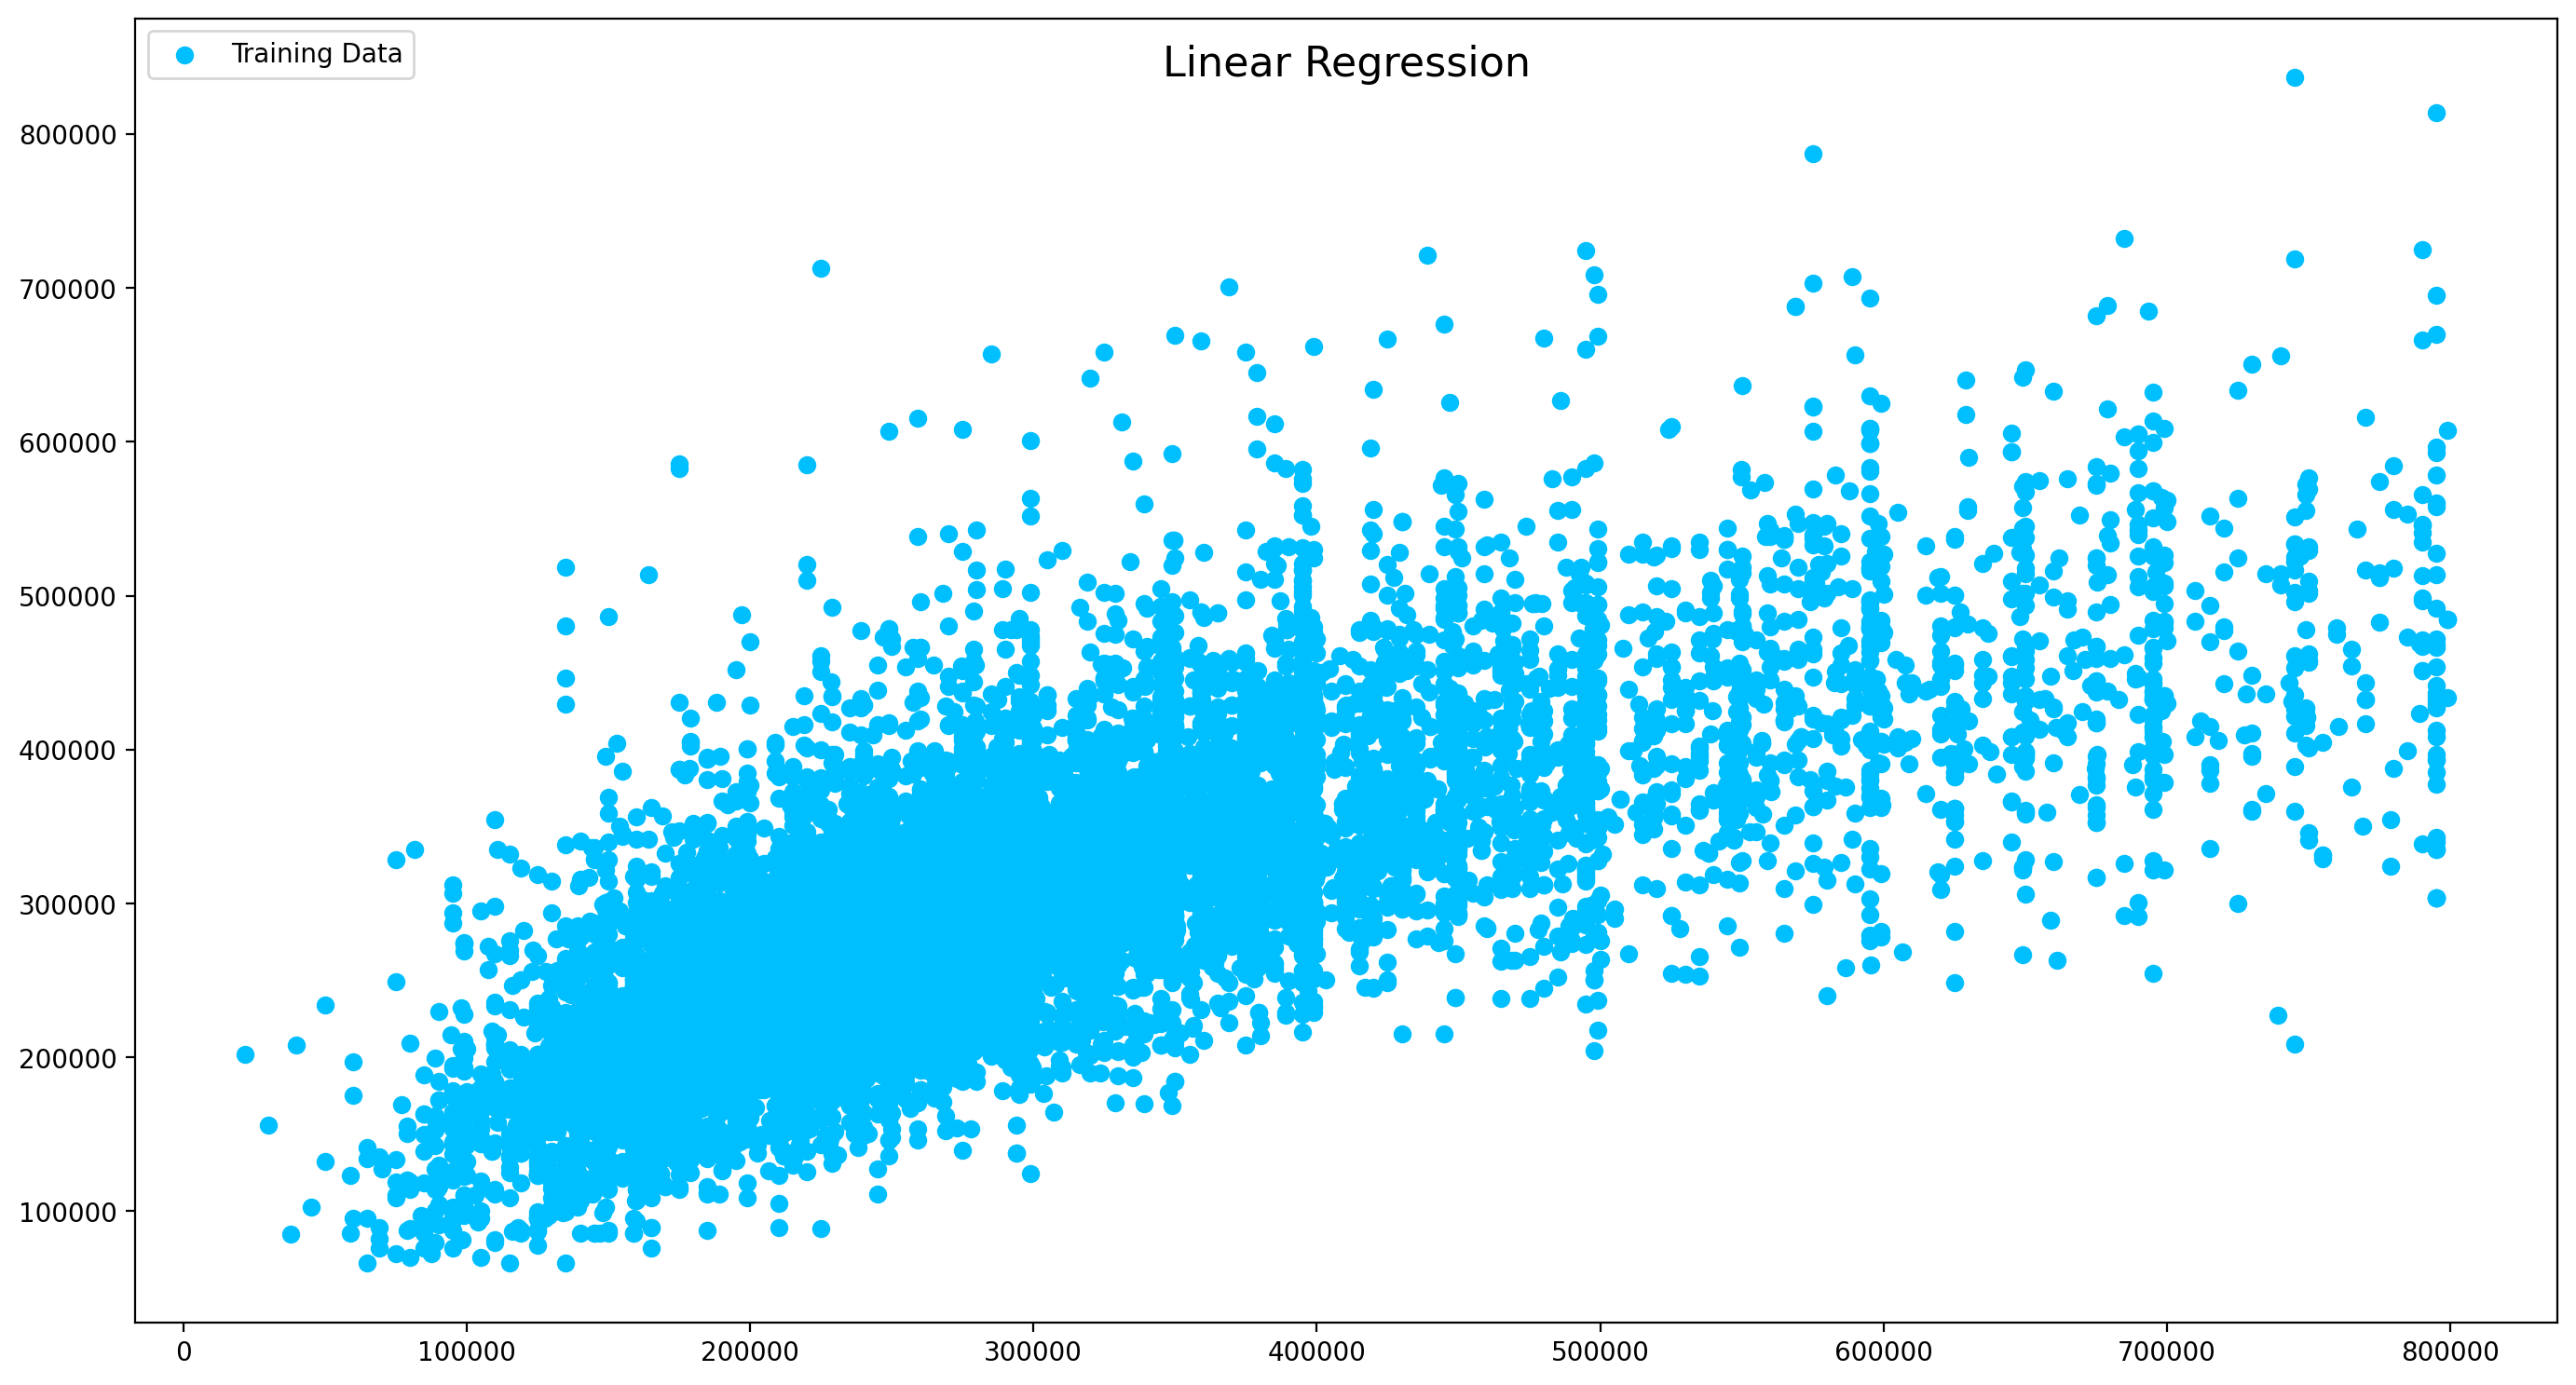

In [1798]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression", fontsize=16)

plt.scatter(y_train, y_predict, color="deepskyblue", label="Training Data")
axes.legend()

plt.show()

### Check precision with dev set data

MSE : 91040.31698706384
R-square / precision of prediction: 0.5144306639134328
Adjusted R-square / precision of prediction: 0.5133033055875271
Square root of the adjusted R-square:  0.7164518864428561


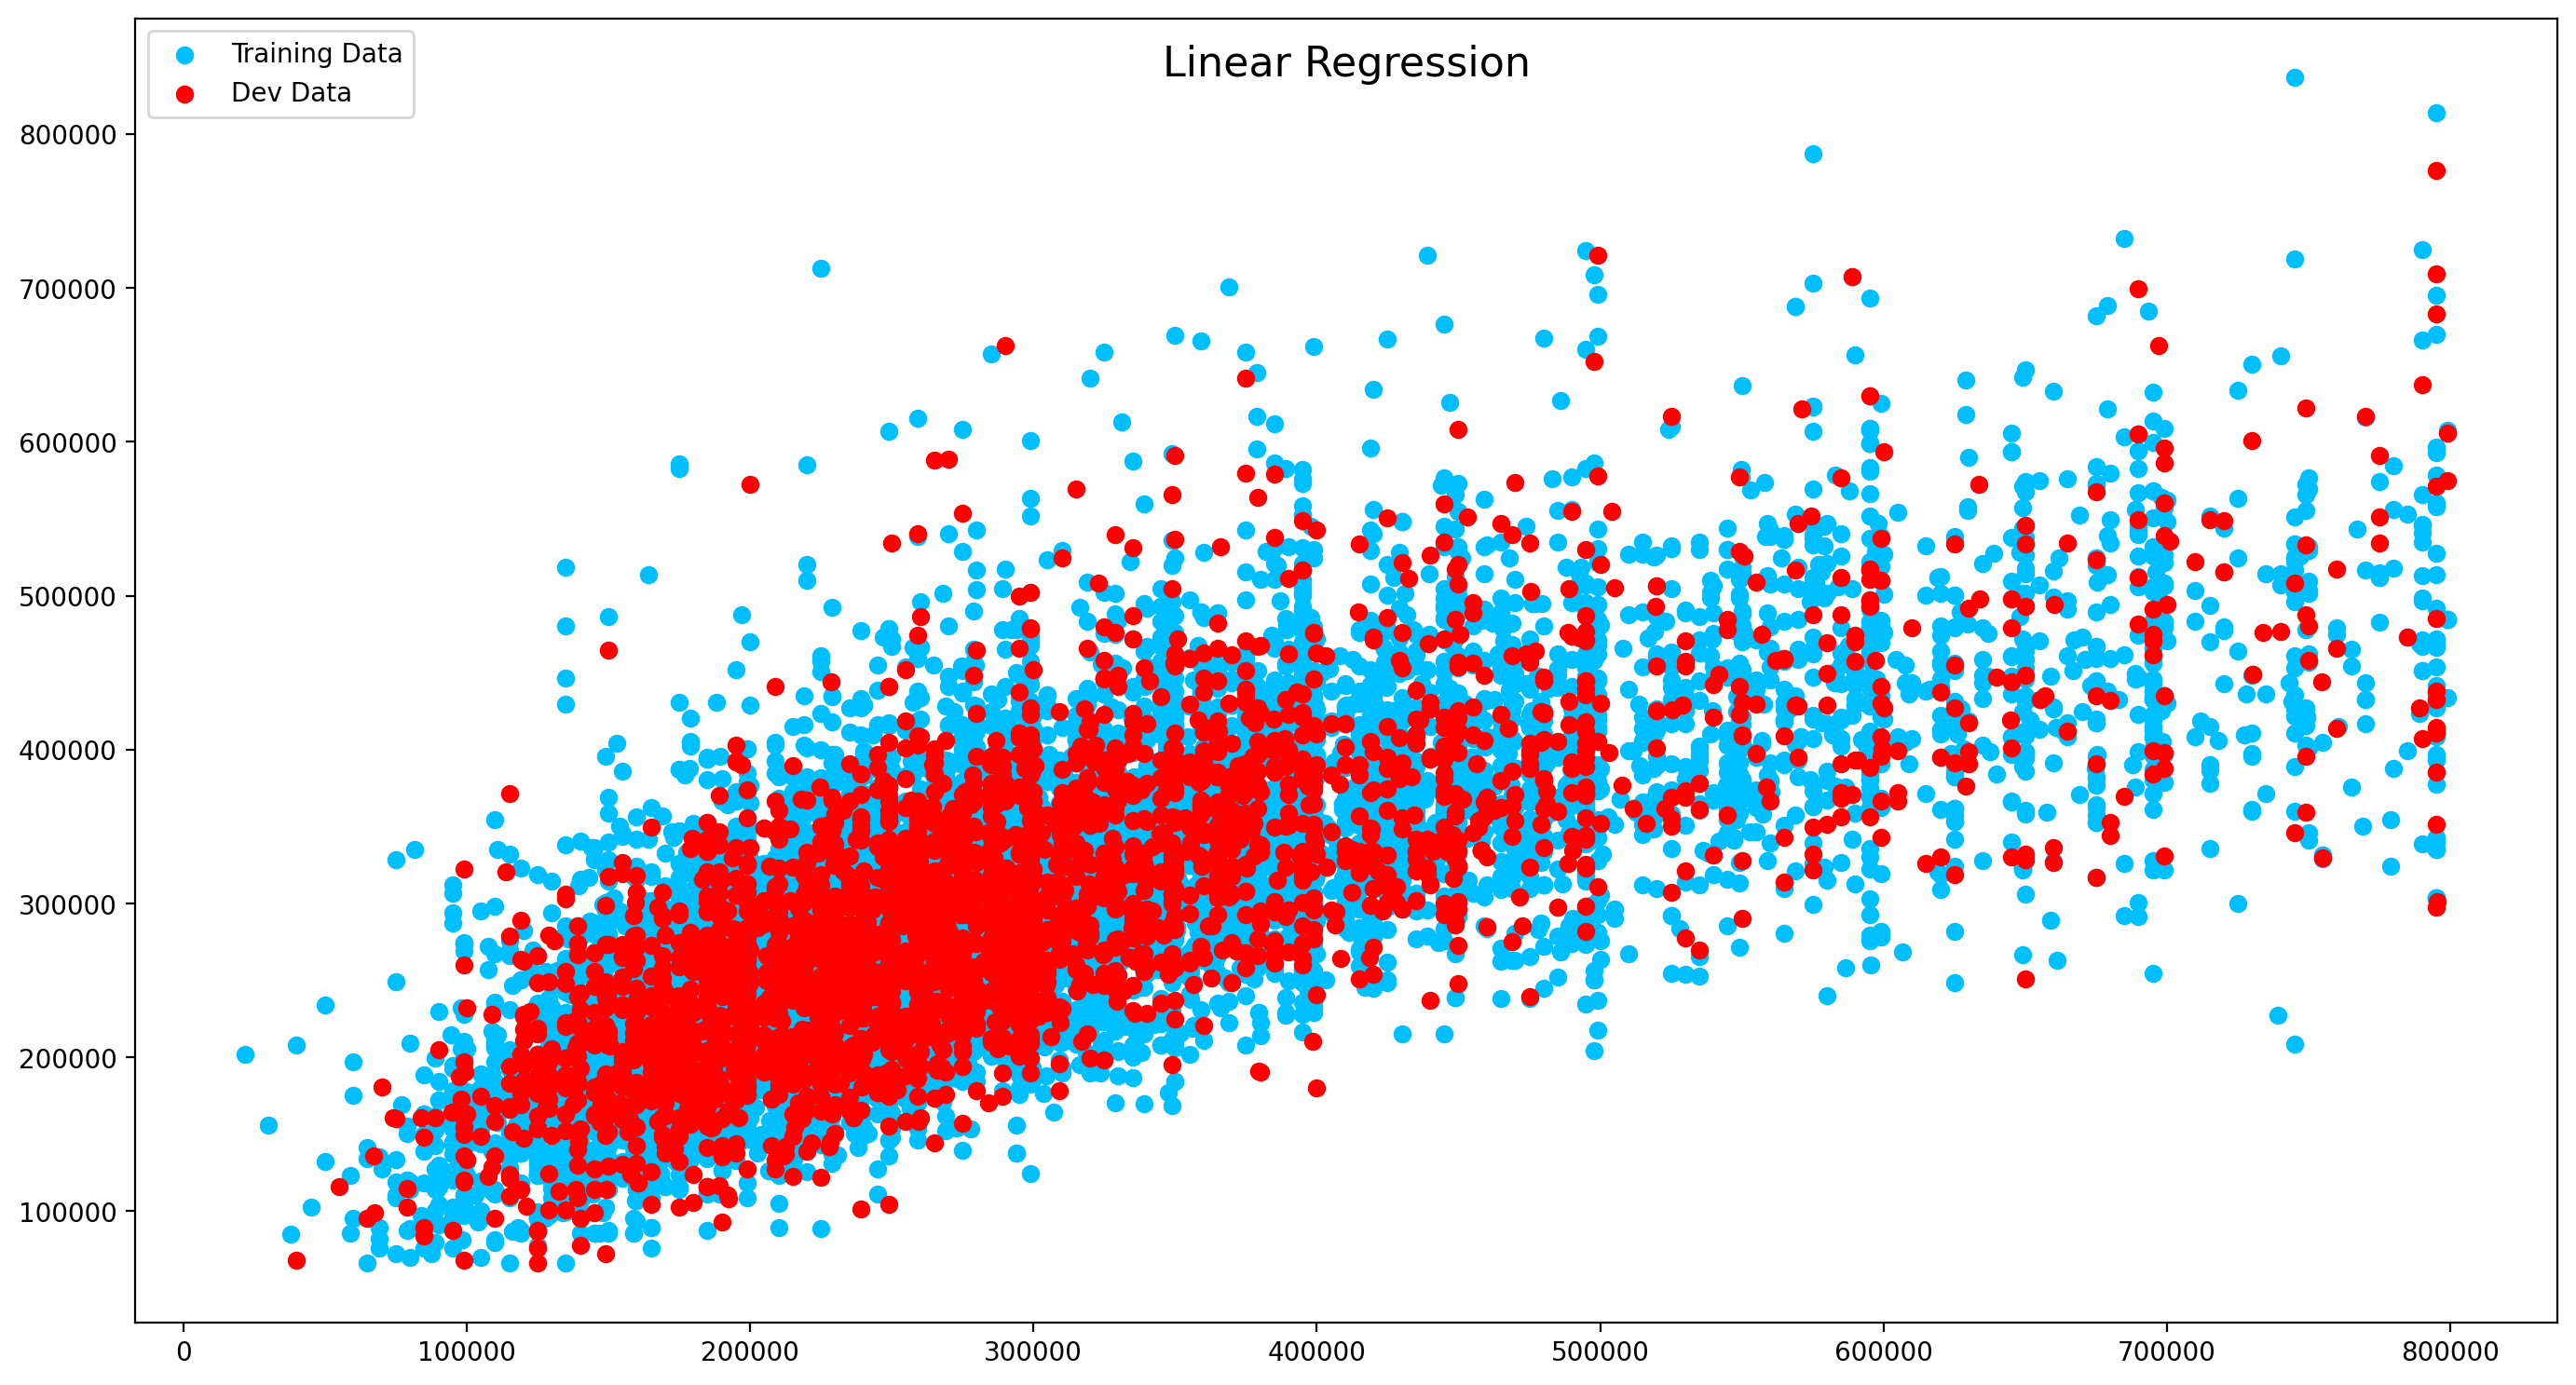

In [1799]:
x_dev_norm = scaler.transform(x_dev)

y_predict_dev = MLR.predict(x_dev_norm)

mse_dev = metrics.mean_squared_error(y_dev, y_predict_dev)
r_mse_dev = math.sqrt(mse_dev)
print('MSE :', r_mse_dev)

r_sqr_dev = metrics.r2_score(y_dev, y_predict_dev)
print('R-square / precision of prediction:',r_sqr_dev)

n = 3023 #number of rows
p = 7 #number of columns
adj_r_sqr_dev = 1-(1-r_sqr_dev)*(n-1)/(n-p-1)
print('Adjusted R-square / precision of prediction:',adj_r_sqr_dev)
print("Square root of the adjusted R-square: ",math.sqrt(adj_r_sqr_dev))

fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression", fontsize=16)


plt.scatter(y_train, MLR.predict(x_train_norm), color="deepskyblue", label="Training Data")
plt.scatter(y_dev, y_predict_dev, color="red", label="Dev Data")
axes.legend()

plt.show()


### Check with test set data

MSE : 91912.70427604811
R-square / precision of prediction: 0.5270379387560791
Adjusted R-square / precision of prediction: 0.5261597598625227
Square root of the adjusted R-square:  0.7253687061505498


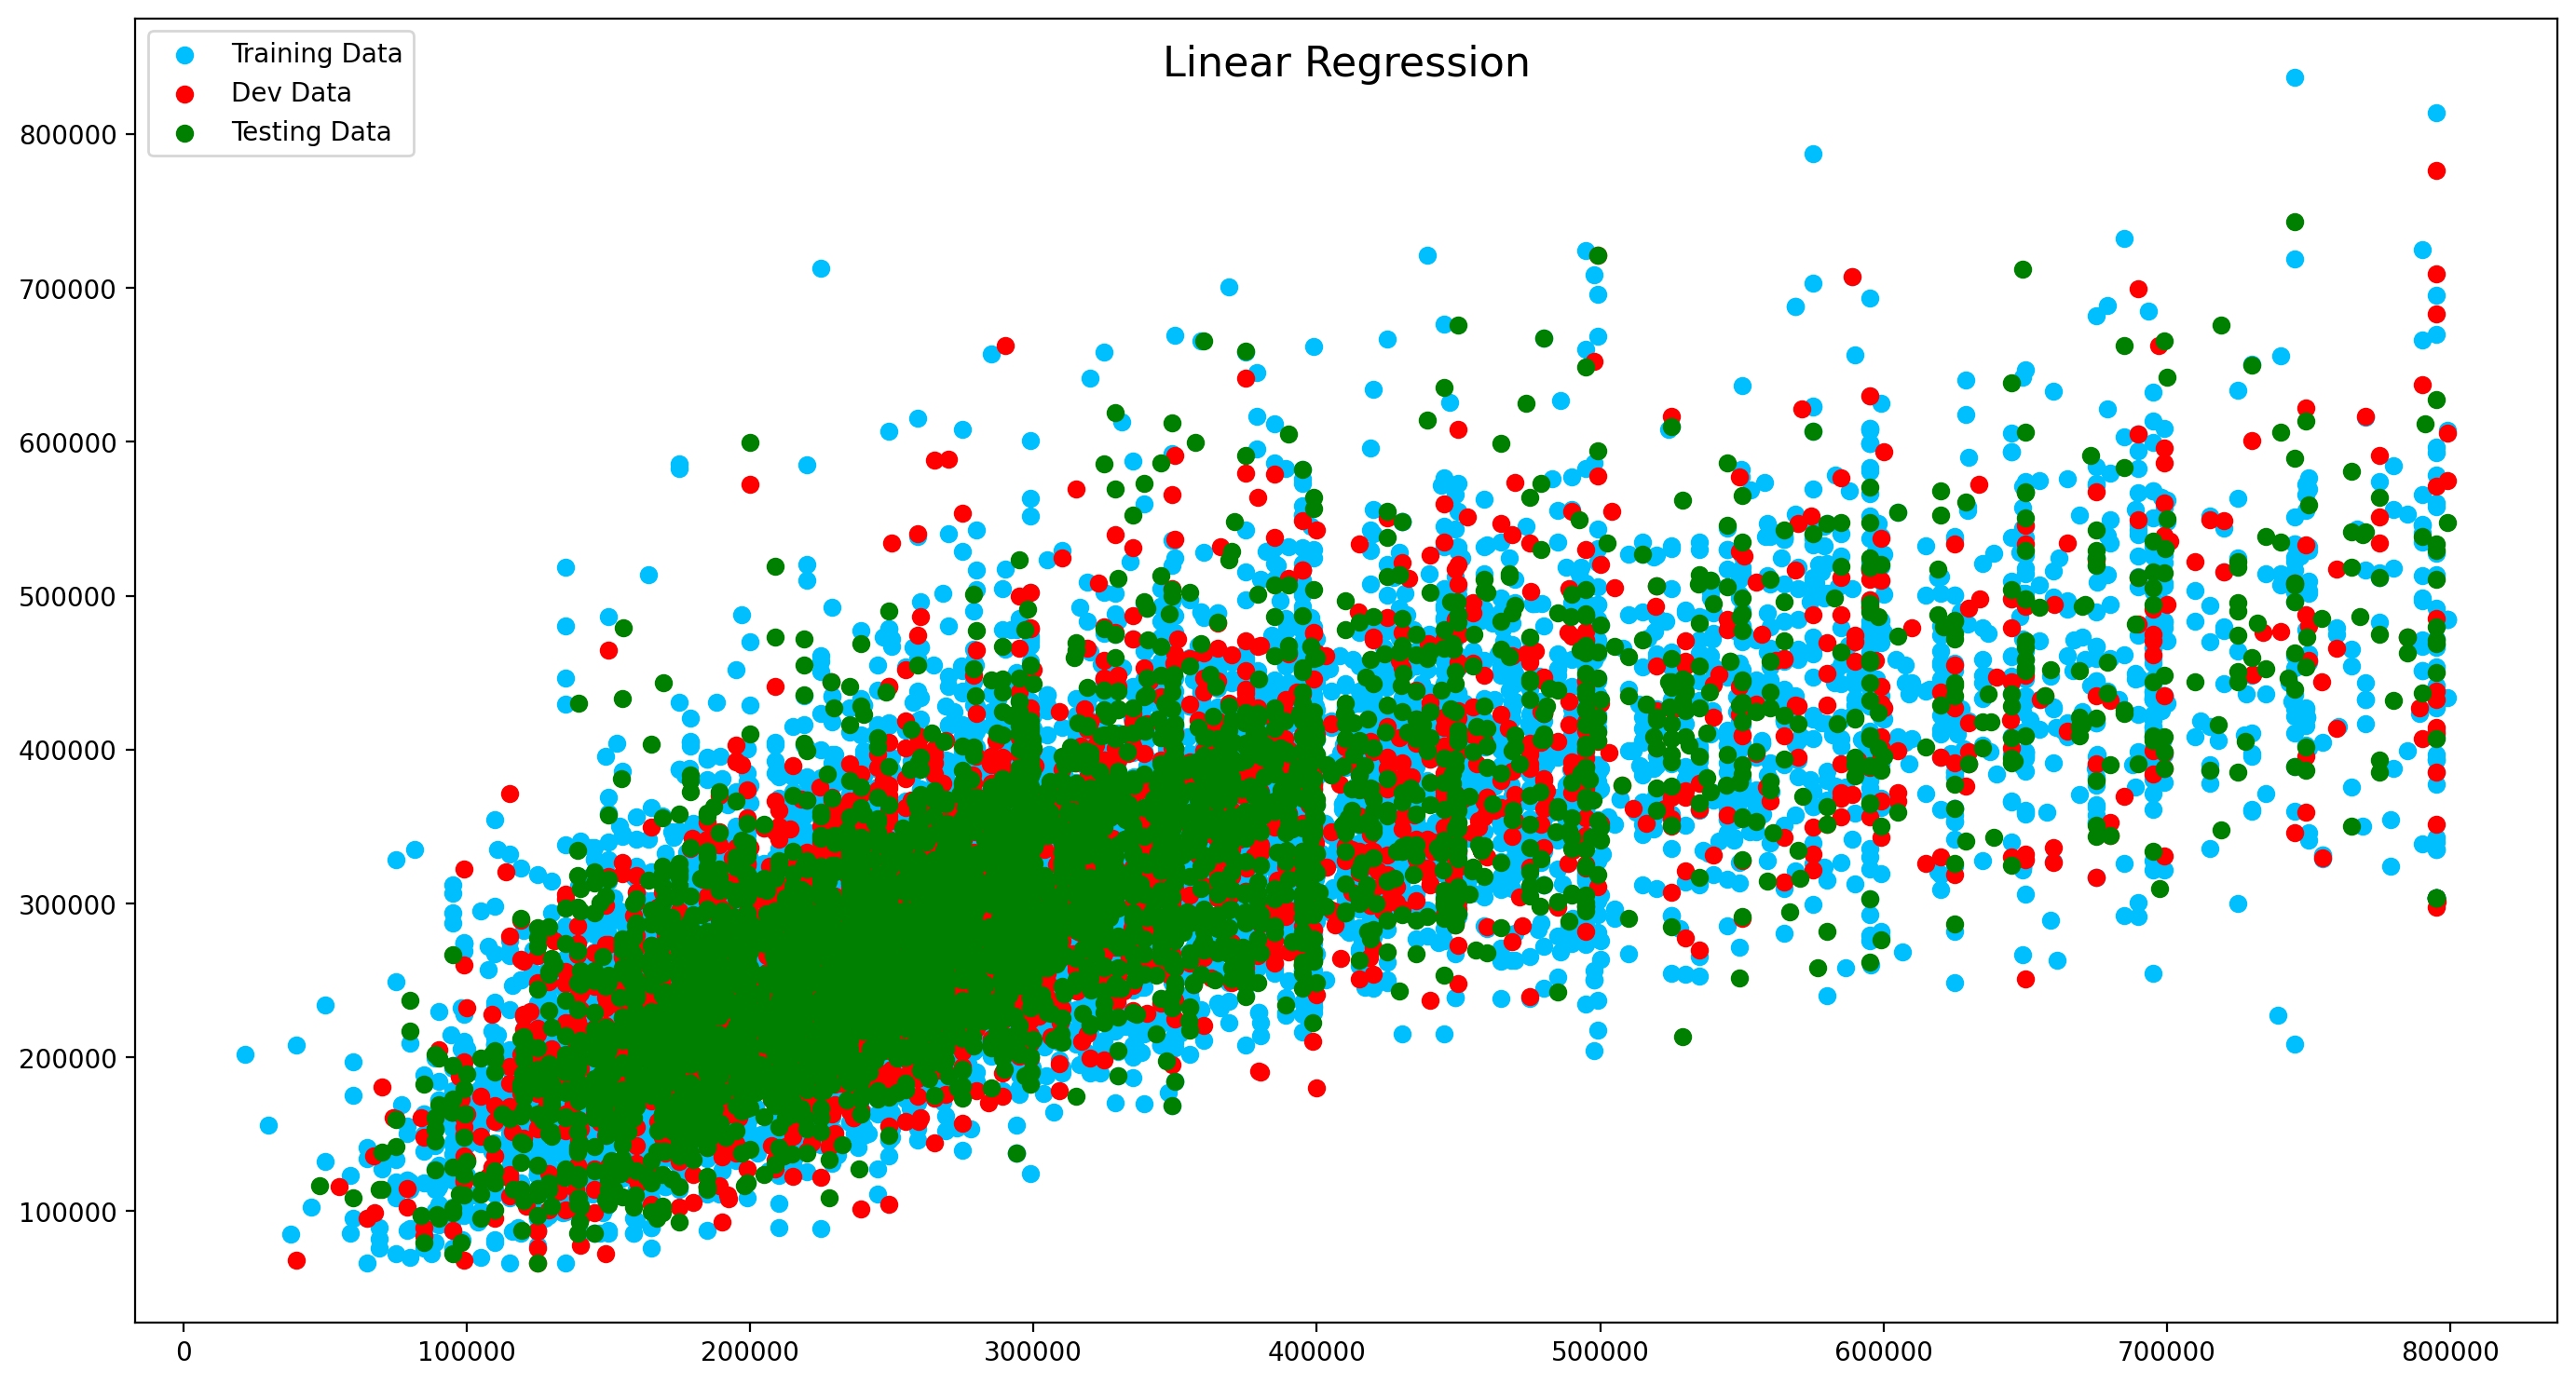

In [1800]:
x_test_norm = scaler.transform(x_test)

y_predict_test = MLR.predict(x_test_norm)

mse_test = metrics.mean_squared_error(y_test, y_predict_test)
r_mse_test = math.sqrt(mse_test)
print('MSE :', r_mse_test)

r_sqr_test = metrics.r2_score(y_test, y_predict_test)
print('R-square / precision of prediction:',r_sqr_test)

n = 3778 #number of rows
p = 7 #number of columns
adj_r_sqr_test = 1-(1-r_sqr_test)*(n-1)/(n-p-1)
print('Adjusted R-square / precision of prediction:',adj_r_sqr_test)
print("Square root of the adjusted R-square: ",math.sqrt(adj_r_sqr_test))


fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression", fontsize=16)


plt.scatter(y_train, MLR.predict(x_train_norm), color="deepskyblue", label="Training Data")
plt.scatter(y_dev, MLR.predict(x_dev_norm), color="red", label="Dev Data")
plt.scatter(y_test, y_predict_test,color="green", label="Testing Data")
axes.legend()


plt.show()

### Polynomial regression

Score : 0.5476170304179111
MSE : 90812.7673009658
R-square / precision of prediction: 0.5382902596649712
Adjusted R-square / precision of prediction: 0.5372182967520872
Square root of the adjusted R-square:  0.7329517697311926


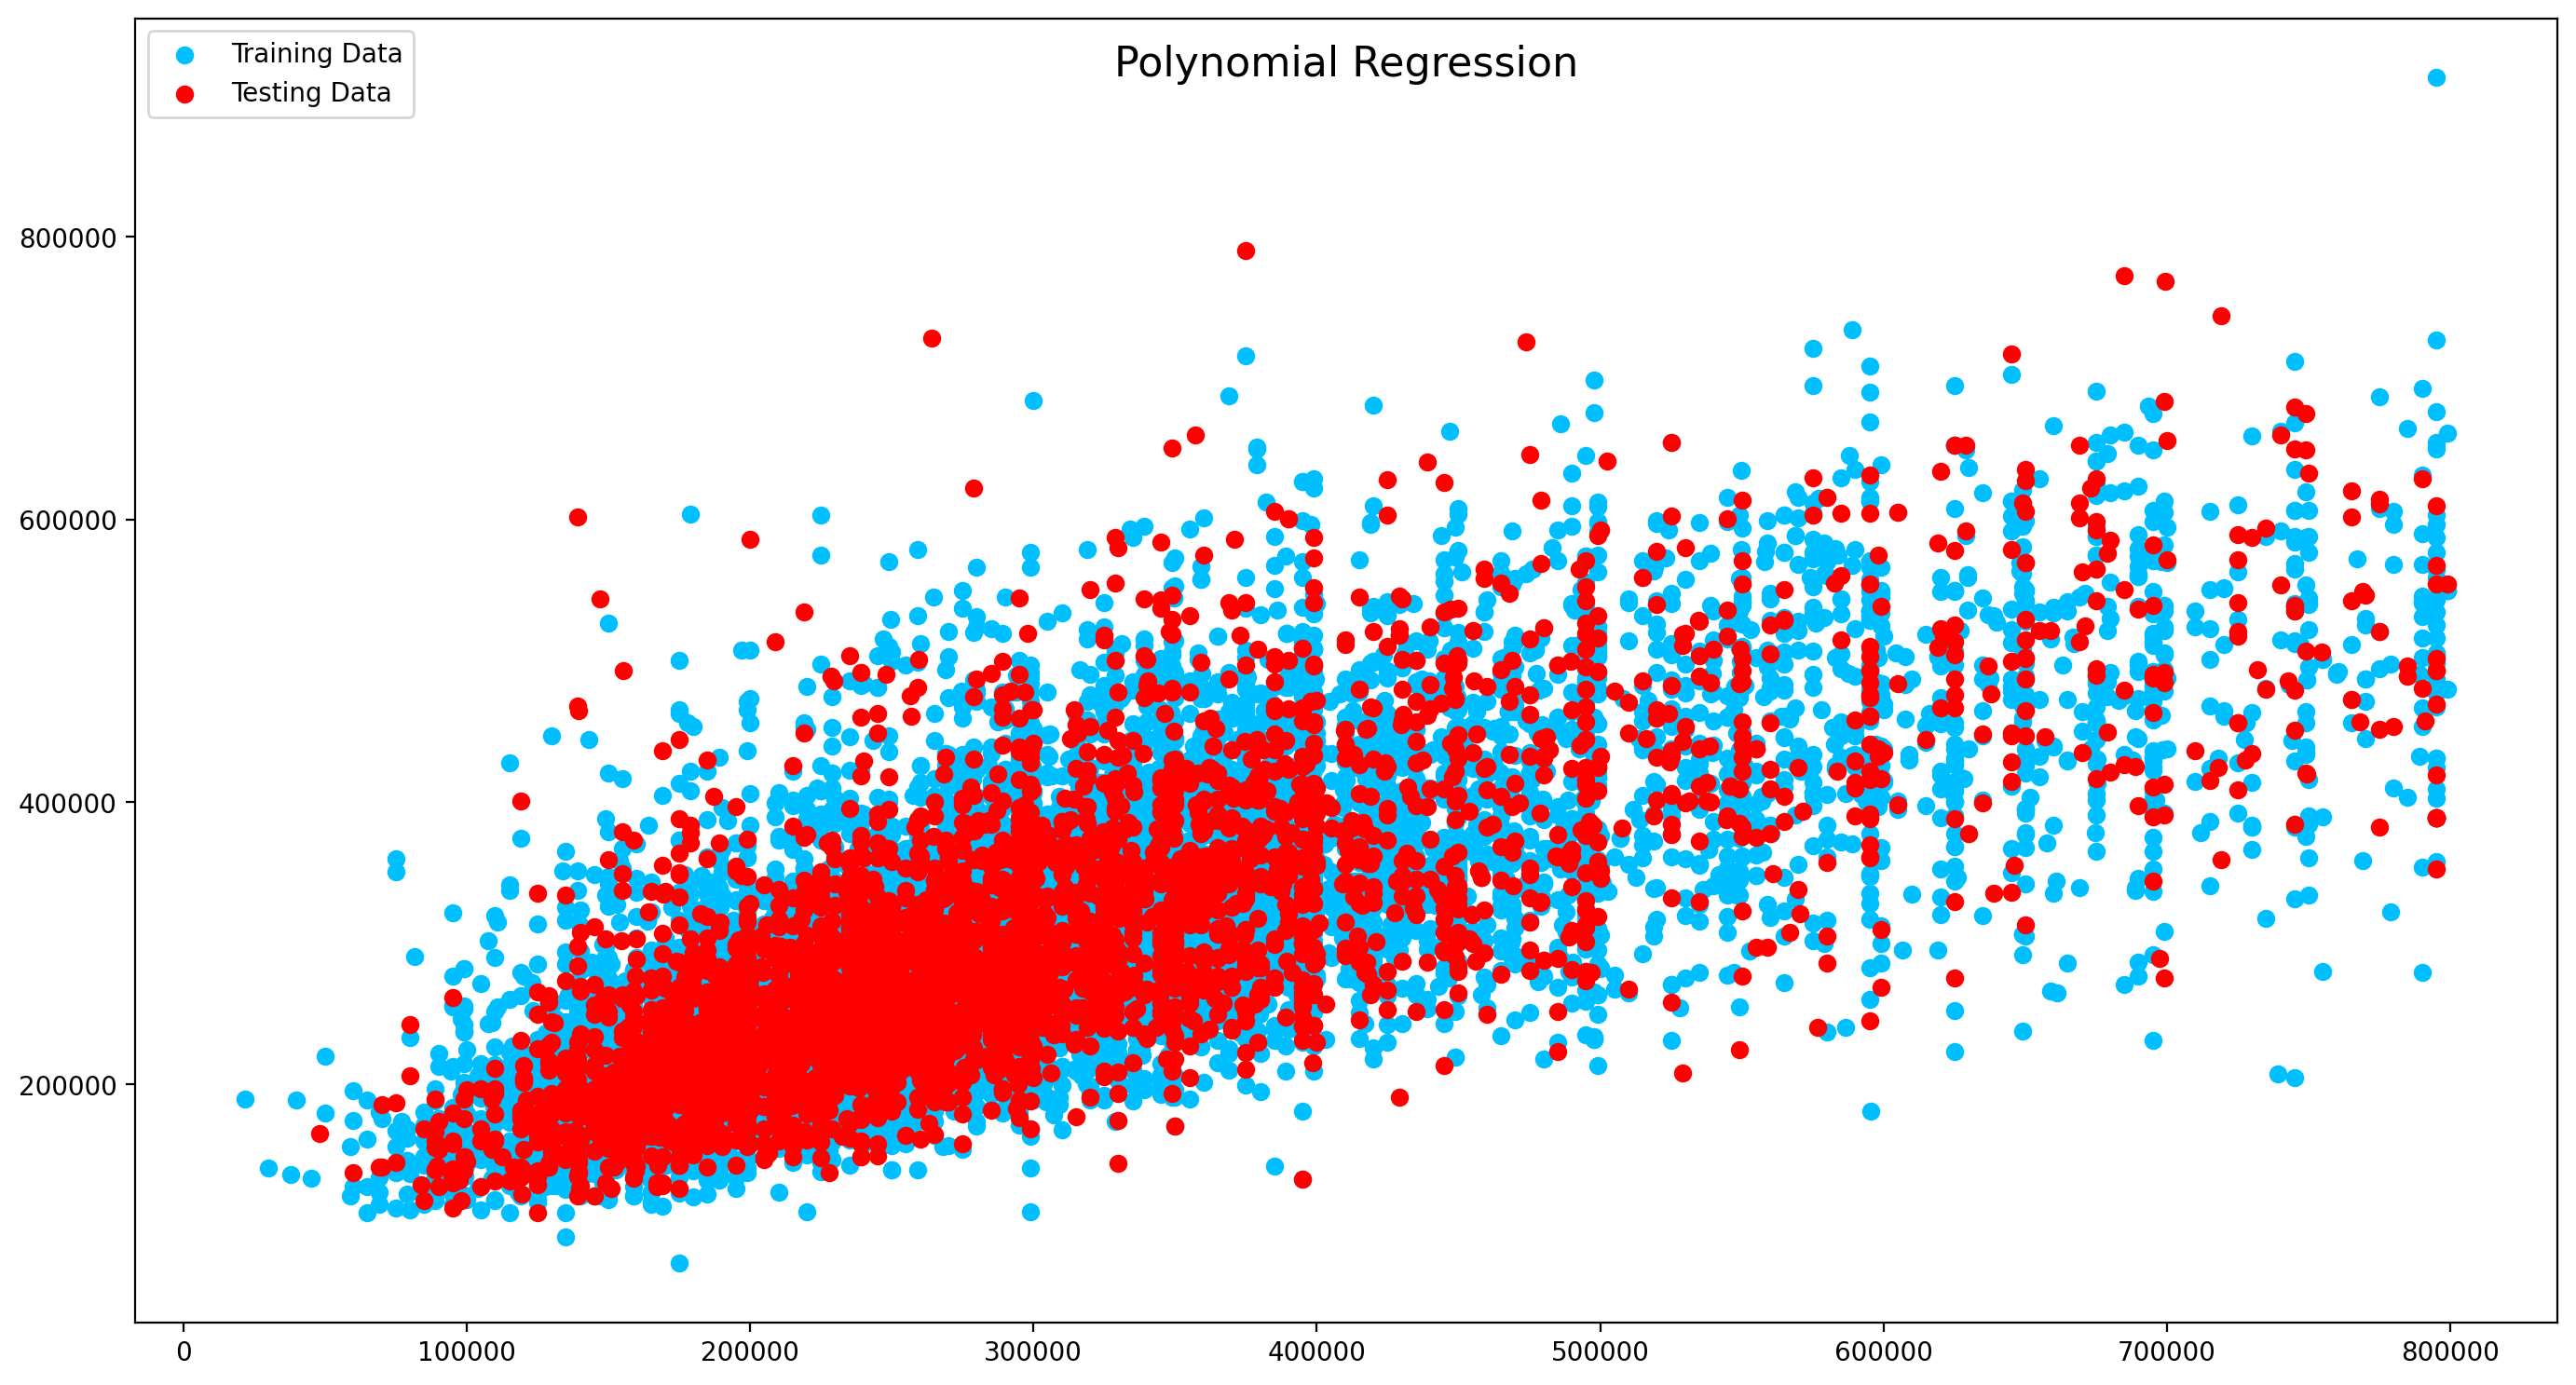

In [1801]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_reg.fit(x_train, y_train)

y_pred = poly_reg.predict(x_test)

print("Score :", poly_reg.score(x_train, y_train))

mse_poly = metrics.mean_squared_error(y_test, y_pred)
r_mse_poly = math.sqrt(mse_poly)
print('MSE :', r_mse_poly)

r_sqr_poly = metrics.r2_score(y_test, y_pred)
print('R-square / precision of prediction:',r_sqr_poly)

n = 3023 #number of rows
p = 7 #number of columns
adj_r_sqr_poly = 1-(1-r_sqr_poly)*(n-1)/(n-p-1)
print('Adjusted R-square / precision of prediction:',adj_r_sqr_poly)
print("Square root of the adjusted R-square: ",math.sqrt(adj_r_sqr_poly))



fig = plt.figure(figsize=(13, 7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Polynomial Regression", fontsize=16)

plt.scatter(y_train, poly_reg.predict(x_train), color="deepskyblue", label="Training Data")
plt.scatter(y_test, y_pred, color="red", label="Testing Data")
axes.legend()


plt.show()


